In [2]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# Modelling - LR, Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression




# Suppress warnings
import warnings; warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

In [62]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [30]:
df.info()
df.shape
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<bound method NDFrame.describe of         ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  On

In [22]:
cr_df = df.drop('ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [61]:
cr_df['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

Among 5,000 customers, only 480 (=9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [20]:
#The Loan_Amount_Term is highly skewed - so we will delete this column
cr_df.drop(['Personal Loan'], axis=1, inplace=True)

In [39]:
cr_df.isnull().sum()

# There is no missing values or zeros in any attribute

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [68]:
for i in list(cr_df.columns):   # checking value unique of all object type columns
    print(cr_df[i].unique())
    print()

[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]

[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]

[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]

[91107 90089 94720 94112 91330 92121 91711 93943 93023 94

In [49]:
#Lets analysze the distribution of the various attribute
cr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


observation on the Data 

    Age: numerical, quantitative, ratio (has true zero, technically). Whether it's discrete or continuous depends on whether they are measured to the nearest year or not. At present, it seems it's discrete. Min age in the dataset being 23 and max being 67.
    Experience: numerical (continuous), quantitative, interval (an experience of 0 means no experience). Min experience in the dataset being -3 (which seems to be an error made while recording) and max experience being 43.
    Income: numerical (continuous), quantitative, interval (an income of 0 means no income). Min income in the dataset being 8,000 dollars while the maximum income being 224,000 dollars.
    ZIP Code: categorical (sum of two zip codes is not meaningful), qualitative, nominal.
    Family: categorical, qualitative, ordinal. Lowest family size being 1 and max being 4.
    CCAvg: numerical (continuous), quantitative, interval. Min average spending on credit cards per month being zero dollars and maximum being 10,000 dollars.
    Education: categorical, qualitative, ordinal. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
    Mortgage: numerical (continuous), quantitative, interval. Min mortage value in the dataset being zero dollars, which means there was no house mortage, and maximum value being 635,000 dollars.
    Personal Loan: also the target variable. categorical (binary), qualitative, nominal. If the customer accepted the personal loan offered in the last campaign then 1 else 0.
    Securities Account: categorical (binary), qualitative, nominal. If the customer has a securities account with the bank then 1 else 0.
    CD Account: categorical (binary), qualitatitve, nominal. If the customer has a certificate of deposit (CD) account with the bank then 1 else 0.
    Online: categorical (binary), qualitative, nominal. If the customer uses internet banking facilities then 1 else 0.
    CreditCard: categorical (binary), qualitative, nominal. If the customer use a credit card issued by UniversalBank then 1 else 0.


Descriptive statistics for the numerical variables (Age, Experience, Income, CCAvg, Mortgage)

    Age: Range of Q1 to Q3 is between 35 to 55. Since the mean is almost similar to median, we can say that Age is normally distributed.
    Experience: Range of Q1 to Q3 is between 20 to 30. Since the mean is almost similar to median, we can say that Experience is normally distributed. However, as mentioned above also, there are some recording errors in experience. We can either remove these rows (values) or else impute those to mean/median values.
    Income: Range of Q1 to Q3 is between 39 to 98. Since mean is greater than median, we can say that Income is right (positively) skewed.
    CCAvg: Range of Q1 to Q3 is between 0.70 to 2.50. Since mean is greater than median, we can say that CCAvg is right (positively) skewed.
    Mortgage: 75% of data values are around 101,000 dollars whereas the maximum value being 635,000 dollars. Mortage is highly skewed towards right.



In [54]:
# Let us look at the target column which is 'Mortgage' to understand how the data is distributed amongst the various values
cr_df["Mortgage"].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [55]:
cr_df["CreditCard"].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [69]:
for i in list(cr_df.columns):   # checking value unique of all object type columns
    print(cr_df[i].value_counts())
    print()

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Ex

In [75]:
# Checking count of negative values in Experience
cr_df.loc[cr_df['Experience'] < 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZIP Code,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
Personal Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0
Securities Account,52.0,0.115385,0.322603,0.0,0.00,0.0,0.000,1.0


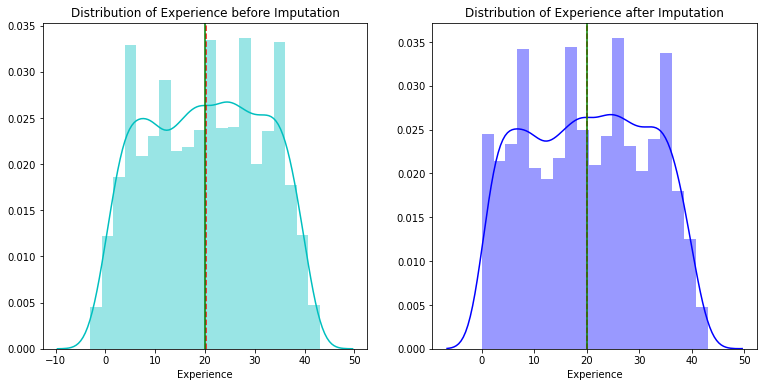

In [77]:
# Checking distribution of Experience column before and after imputation
fig = plt.figure(figsize=(12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(cr_df['Experience'], color = 'c', ax = ax).set_title('Distribution of Experience before Imputation')
ax.axvline(cr_df['Experience'].mean(), color = 'r', linestyle = '--', label = 'Mean')
ax.axvline(cr_df['Experience'].median(), color = 'g', linestyle = '-', label = 'Median')

replace_value = cr_df.loc[(cr_df['Age'] > 23) & (cr_df['Age'] <= 29) & (cr_df['Income'] > 12) & (cr_df['Income'] < 150) & 
         (cr_df['Personal Loan'] == 0) & (cr_df['CD Account'] == 0), 'Experience'].median()

# replacing the negative values with 2
cr_df['Experience'] = np.where(cr_df['Experience'] < 0, replace_value, cr_df['Experience'])

ax = fig.add_subplot(122)
sns.distplot(cr_df['Experience'], color = 'b', ax = ax).set_title('Distribution of Experience after Imputation')
ax.axvline(cr_df['Experience'].mean(), color = 'r', linestyle = '--', label = 'Mean')
ax.axvline(cr_df['Experience'].median(), color = 'g', linestyle = '-', label = 'Median')



Text(0.5, 1.0, 'Distribution of Income for taking Personal Loan')

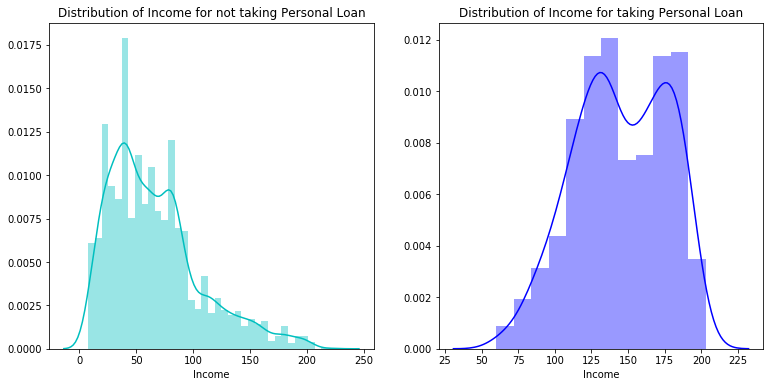

In [78]:
# Distribution of Income
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(cr_df[(cr_df['Personal Loan'] == 0)]['Income'], color = 'c', 
             ax = ax).set_title('Distribution of Income for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(cr_df[(cr_df['Personal Loan'] == 1)]['Income'], color = 'b', 
             ax = ax).set_title('Distribution of Income for taking Personal Loan')

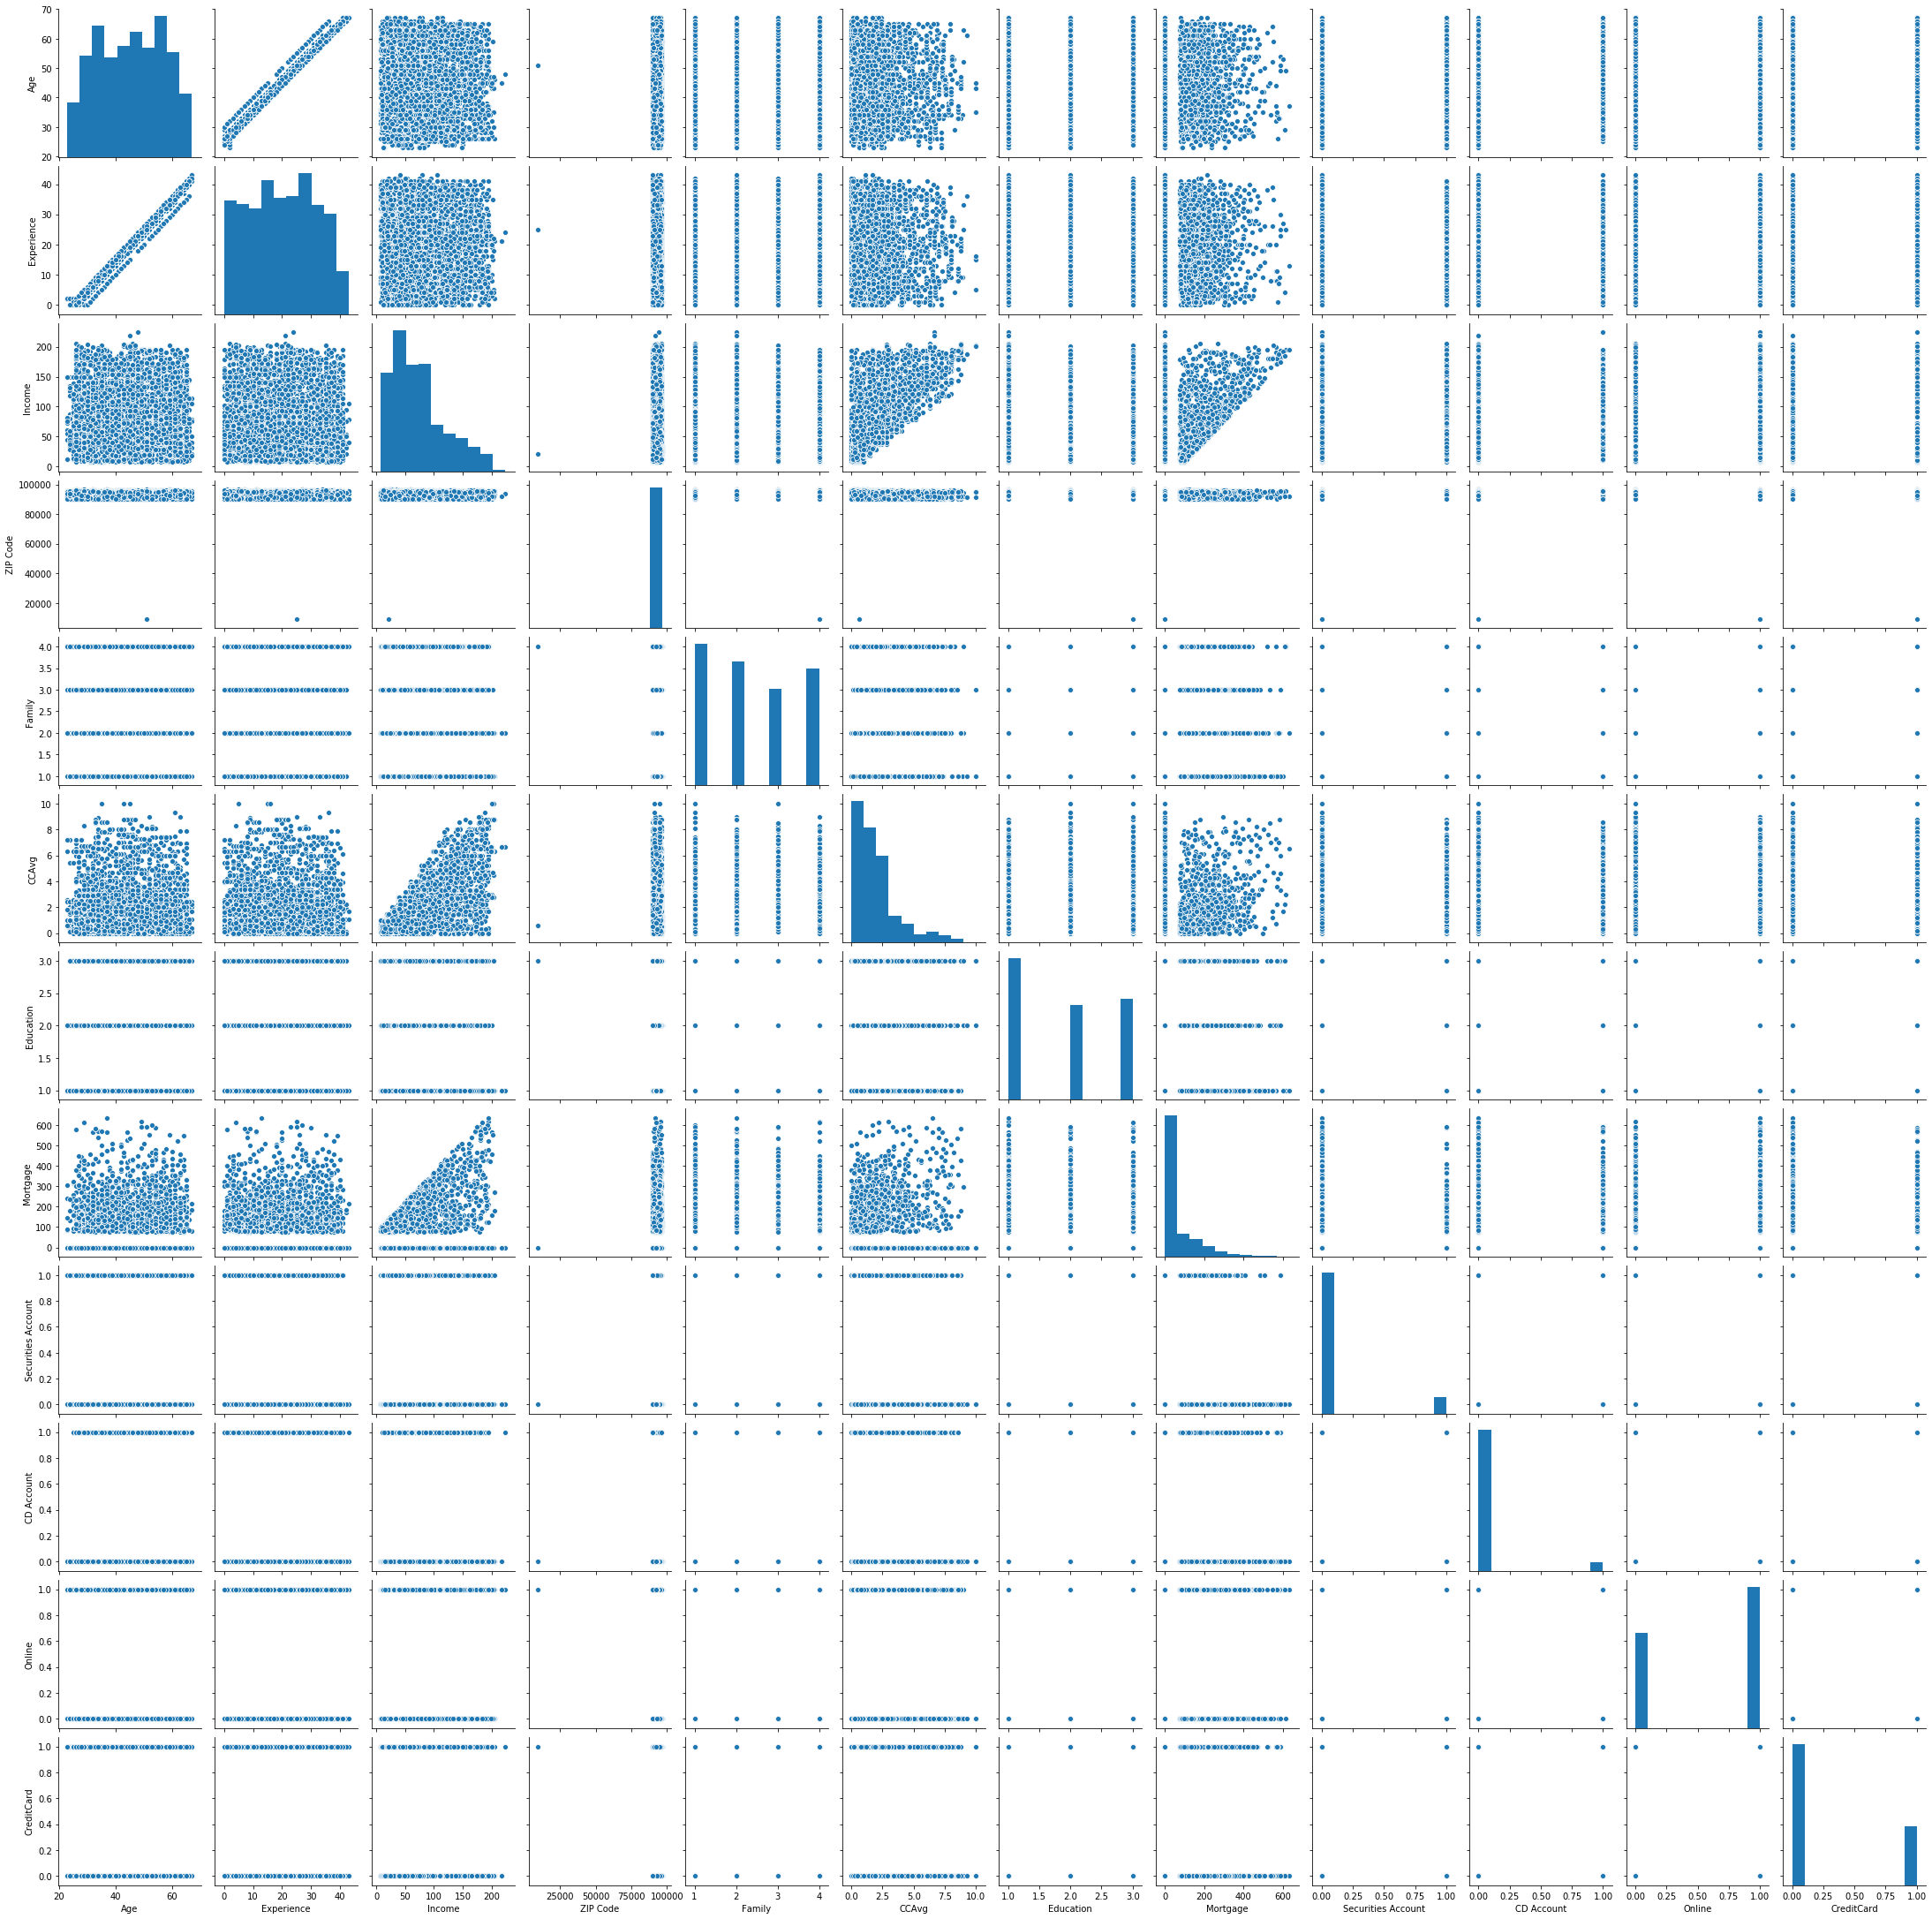

In [85]:
# Pairplot
sns.pairplot(cr_df)


 From pairplots

    Age and Experience have strong positive correlation.
    ZIP Code has one outlier value which is less than 10K.
    People those who are taking Personal Loan that was offered to them in earlier campaign have a significantly different Income distribution then people who aren't taking the personal loan.
    CCAvg i.e. Average spending on cards differs for people taking the personal loan and those who aren't taking the personal loan.
    Family size is also an important factor for people considering taking personal loan from bank that was offered in earlier campaign and so is Mortgage, CD Account, Education (to some extent) among other variables.



In [ ]:
# Checking the outlier in ZIP Code
display(cr_df[cr_df['ZIP Code'] < 10000])
plt.figure(figsize = (12.8 , 6))
sns.boxplot(cr_df['ZIP Code'], palette = 'copper').set_title('Outlier in Zip Code')

Zipcode

Since most of the ZIP Code are of 5 digits (possibly US), the above data point would be again be an error made while noting and it would seem logical to remove this particular row from the dataframe.

In [89]:
# dropping index 384
cr_df.drop(384, axis = 0, inplace = True)

Text(0.5, 1.0, 'Distribution of Income by Personal Loan')

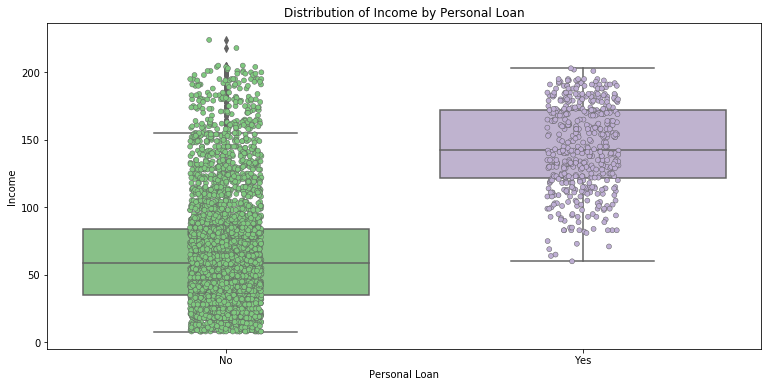

In [90]:
# Distribution of Income by Personal Loan
plt.figure(figsize = (12.8 , 6))
ax = sns.boxplot(x = 'Personal Loan', y = 'Income', palette = 'Accent', data = cr_df)
ax = sns.stripplot(x = 'Personal Loan', y = 'Income', palette = 'Accent', data = cr_df, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Income by Personal Loan')

Text(0.5, 1.0, 'Distribution of Average Spending on Credit Card by Personal Loan')

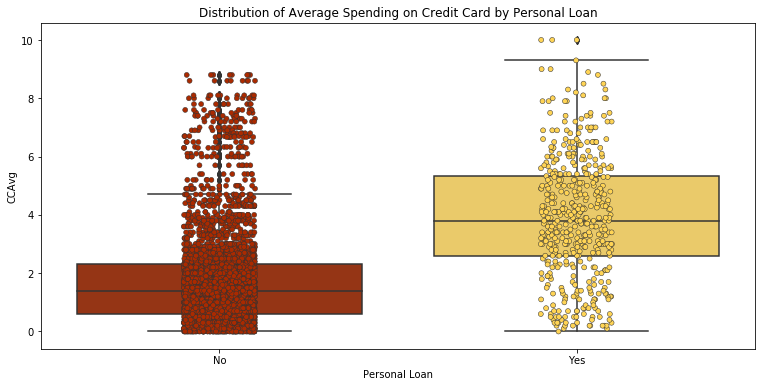

In [91]:


# Distribution of Average Spending on Credit Card by Personal Loan
plt.figure(figsize = (12.8 , 6))
ax = sns.boxplot(x = 'Personal Loan', y = 'CCAvg', palette = 'afmhot', data = cr_df)
ax = sns.stripplot(x = 'Personal Loan', y = 'CCAvg', palette = 'afmhot', data = cr_df, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Average Spending on Credit Card by Personal Loan')



<Figure size 921.6x432 with 0 Axes>

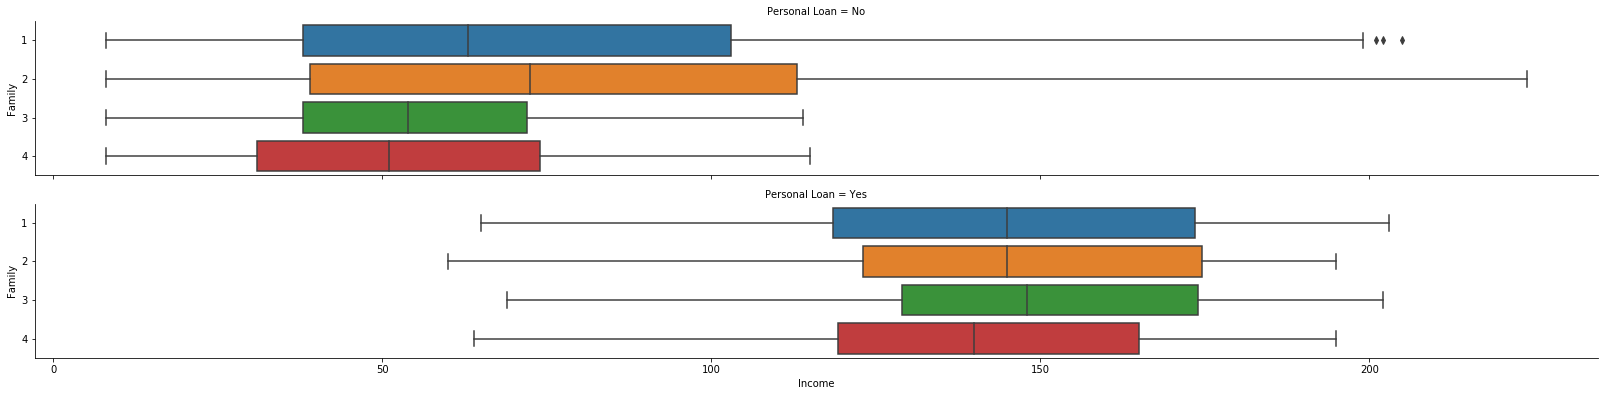

<Figure size 921.6x432 with 0 Axes>

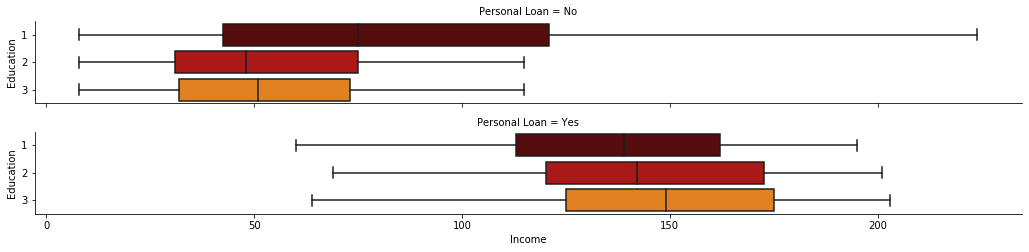

In [92]:
# Distribution of Family Size by Personal Loan and affect of Income
plt.figure(figsize = (12.8 , 6))
sns.catplot(x = 'Income', y = 'Family', row = 'Personal Loan', kind = 'box', orient = 'h', height = 2.8, aspect = 8, 
            data = cr_df)

# Distribution of Education by Personal Loan and affect of Income
plt.figure(figsize = (12.8 , 6))
sns.catplot(x = 'Income', y = 'Education', row = 'Personal Loan', kind = 'box', orient = 'h', 
            height = 1.8, aspect = 8, palette = 'gist_heat', data = cr_df)

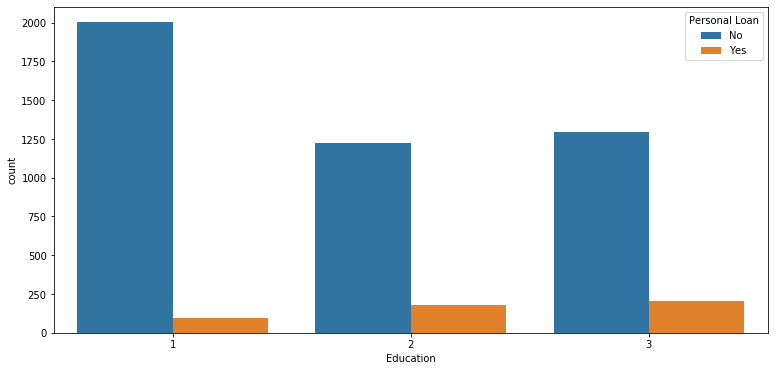

In [93]:
# Countplot of Education by Personal Loan
plt.figure(figsize = (12.8 , 6))
sns.countplot(x = 'Education', hue ='Personal Loan', data = cr_df)

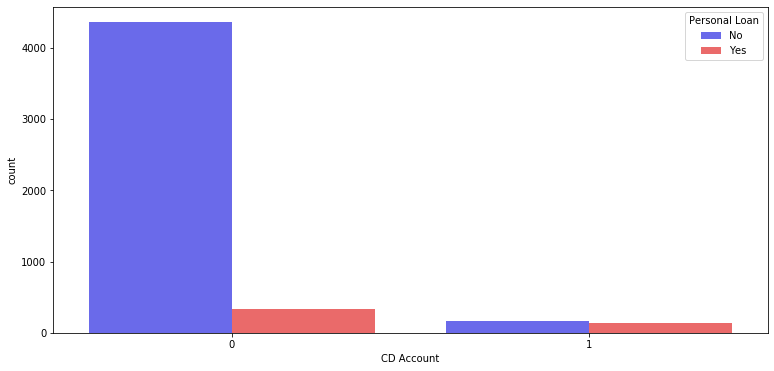

In [94]:
# Countplot of CD Account by Personal Loan
plt.figure(figsize = (12.8 , 6))
sns.countplot(x = 'CD Account', hue ='Personal Loan', palette = 'seismic', data = cr_df)

Income, CCAvg, Family (size), Mortgage, CD Account, Education and Personal Loan

    Higher incomed people in the dataset have taken loan from the bank in their last campaign.
    Higher the income more are the chances of people taking loan from the bank, irrespective of their family size.
    People with family size of 2 are most higher incomed people in the dataset, however that doesn't mean they are the ones taking most loans.
    Average spending on credit cards by people taking personal loan is higher than those who aren't taking personal loan.
    Customers whose education level is 1 (undergrad) is having more income.
    Customers who have taken the personal loan have the same income levels.
    Number of people taking personal loan increases with increase in education level.
    Most of the people who don't have CD Account don't take personal loan as well.
    For people with CD Account, the odds of taking personal loan are fairly similar to not taking.


In [95]:
# Checking number of unique values for categorical columns
cat_cols = ['ZIP Code', 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
cr_df[cat_cols].nunique()

ZIP Code              466
Family                  4
Education               3
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [97]:
#Removing columns such as ID that does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. Neglecting this information for our model prediction.
#Removing ZIP Code from the analysis since it's a nominal variable and contains 466 unique values.
cr_df.drop([ 'ZIP Code'], axis = 1, inplace = True)
cr_df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

Text(0.5, 1, 'Correlation Matrix')

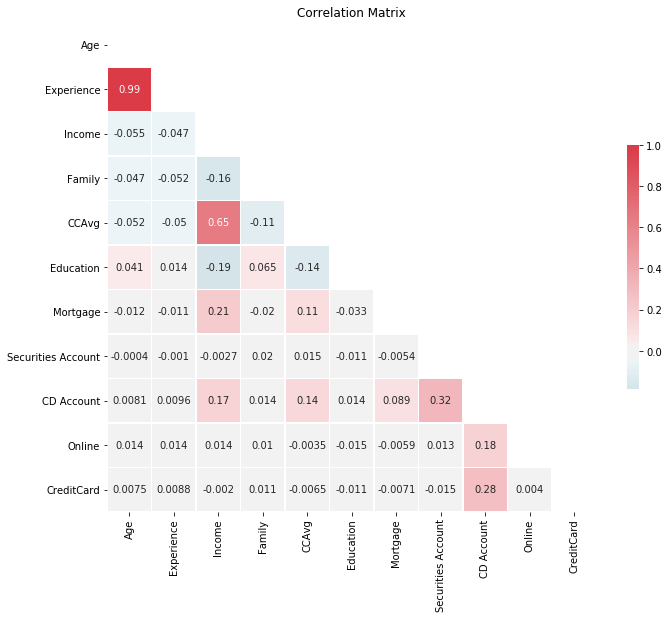

In [99]:
# Correlation matrix for all variables
corr = cr_df.drop('Personal Loan', axis = 1).corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .6, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix')

In [104]:
# Filter for correlation value greater than 0.5
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.5) & (sort < 1)]

Experience  Age           0.993922
Age         Experience    0.993922
CCAvg       Income        0.645931
Income      CCAvg         0.645931
dtype: float64

In [123]:
# Absolute correlation of independent variables with 'Personal Loan' i.e. the target variable
absCorrwithDep = []
allVars = cr_df.drop('Personal Loan', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(cr_df['Personal Loan'].corr(cr_df[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))
#Correlation Matrix¶

#Age and Experience are highly correlated with each other, as noted earlier during the EDA as well.
#CCAvg and Income are moderately correlated with each other.
#As we know that if a variable has a very low correlation with the target variable 
#it's not going to be useful for the model prediction. While deciding whether which one out
#of Age and Experience to be dropped, we will drop Age column as it's correlation with the target 
#variable is relatively less than Experience column.
#Further dropping Online and CreditCard since these columns also have relatively less correlation 
#with the target column.


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [111]:
# Separating dependent and independent variables
X = cr_df.drop(['Personal Loan'], axis = 1)
y = cr_df['Personal Loan']

display(X.describe().T, X.shape, y.shape)



,count,mean,std,min,25%,50%,75%,max
Age,4999.0,45.337267,11.464033,23.0,35.0,45.0,55.0,67.0
Experience,4999.0,20.139428,11.406577,0.0,10.0,20.0,30.0,43.0
Income,4999.0,73.784757,46.032281,8.0,39.0,64.0,98.0,224.0
Family,4999.0,2.396079,1.147554,1.0,1.0,2.0,3.0,4.0
CCAvg,4999.0,1.938206,1.747731,0.0,0.7,1.5,2.5,10.0
Education,4999.0,1.880776,0.839804,1.0,1.0,2.0,3.0,3.0
Mortgage,4999.0,56.510102,101.720837,0.0,0.0,0.0,101.0,635.0
Securities Account,4999.0,0.104421,0.305836,0.0,0.0,0.0,0.0,1.0
CD Account,4999.0,0.060412,0.238273,0.0,0.0,0.0,0.0,1.0
Online,4999.0,0.596719,0.490605,0.0,0.0,1.0,1.0,1.0


(4999, 11)

(4999,)

In [112]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3499, 11)

(1500, 11)

(3499,)

(1500,)

In [118]:
# LR model without hyperparameter tuning
LR = LogisticRegression()
LR.fit(X_train, y_train)

print('Logistic Regression Scores without Hyperparameter Tuning\n\n')
print('LR accuracy for train set: {0:.3f}'.format(LR.score(X_train, y_train)))
print('LR accuracy for test set: {0:.3f}'.format(LR.score(X_test, y_test)))

y_true, y_pred = y_test, LR.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
LR_roc_auc = roc_auc_score(y_true, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, LR.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = {})'.\
         format(LR_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

Logistic Regression Scores without Hyperparameter Tuning


LR accuracy for train set: 0.950
LR accuracy for test set: 0.943

              precision    recall  f1-score   support

          No       0.95      0.99      0.97      1354
         Yes       0.81      0.54      0.65       146

    accuracy                           0.94      1500
   macro avg       0.88      0.76      0.81      1500
weighted avg       0.94      0.94      0.94      1500


Confusion Matrix:
 [[1336   18]
 [  67   79]]

Accuracy Score:
 0.943


ValueError: could not convert string to float: 'No'

In [119]:
# LR with hyperparameter tuning
LR = LogisticRegression(random_state = 42)

params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 110, 120, 130, 140]}

skf = StratifiedKFold(n_splits = 10)
LR_hyper = GridSearchCV(LR, param_grid = params, n_jobs = -1, cv = skf)

LR_hyper.fit(X_train, y_train)

print('Logistic Regression Scores with Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', LR_hyper.best_params_)
print('Best Score is: ', LR_hyper.best_score_.round(3))

print('LR accuracy for train set: {0:.3f}'.format(LR_hyper.score(X_train, y_train)))
print('LR accuracy for test set: {0:.3f}'.format(LR_hyper.score(X_test, y_test)))

y_true, y_pred = y_test, LR_hyper.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
LR_hyper_roc_auc = roc_auc_score(y_true, LR_hyper.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, LR_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression with Hyperparameter Tuning (area = {})'.\
         format(LR_hyper_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

Logistic Regression Scores with Hyperparameter Tuning


Best Hyper Parameters are:  {'C': 100, 'max_iter': 120, 'penalty': 'l2'}
Best Score is:  0.952
LR accuracy for train set: 0.953
LR accuracy for test set: 0.942

              precision    recall  f1-score   support

          No       0.95      0.98      0.97      1354
         Yes       0.79      0.55      0.65       146

    accuracy                           0.94      1500
   macro avg       0.87      0.77      0.81      1500
weighted avg       0.94      0.94      0.94      1500


Confusion Matrix:
 [[1332   22]
 [  65   81]]

Accuracy Score:
 0.942


ValueError: could not convert string to float: 'No'

# Bussniss Insights 

Most of the ML models works best when the number of classes are in equal proportion since they are designed to maximize accuracy and reduce error. Thus, they do not take into account the class distribution / proportion or balance of classes. In our dataset, the percentage of customer accepting the bank loan offered in campaign (class 1) is 9.6% whereas 90.4% of customers didn't accept the loan offered (class 0).

The confusion matrix is another metric that is often used to measure the performance of a classification algorithm, which contains information about the actual and the predicted class.

Confusion matrix means

True Positive (observed=1,predicted=1):

Predicted that home loan will be granted and the customer was eligibile for loan

False Positive (observed=0,predicted=1):

Predicted that home loan will be granted and the customer was not eligibile for loan

True Negative (observed=0,predicted=0):

Predicted that home loan will not be granted and the customer was not eligibile for loan

False Negative (observed=1,predicted=0):

Predicted that home loan will not be granted and the customer was eligibile for loan

Here the bank wants to give loan to the people who are eligible for the home loan i.e. less number of False Positive, if FP is high bank would lose money. So that the bank doesn't lose money on the people who are not eligible for the loan. Hence Precision is the important metric.

In case of False negative bank will lose few customers but that okay because the bank would want to retain money more than customers who are not eligible for loan.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who is eligible for home loan. They can use the model for upcoming customers.
